# Synthetic Dataset Types for Kernel Intuition

This notebook generates six different types of synthetic datasets to explore the behavior of Additive Gaussian Process (Additive GP) and Orthogonal Additive Kernel (OAK) models. Each dataset is saved in binary MATLAB `.mat` format.

# Regression


In [2]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data directory exists
os.makedirs("data", exist_ok=True)

# Function to plot dataset
def plot_synthetic_data(X, title, feature_names):
    plt.figure(figsize=(12, 6))
    for i in range(1, X.shape[1]):  # Skip the first column (y)
        plt.subplot(2, (X.shape[1] - 1) // 2 + 1, i)
        plt.scatter(X[:, i], X[:, 0], alpha=0.5, label=f"{feature_names[i-1]} vs y")
        plt.xlabel(feature_names[i - 1])
        plt.ylabel("y")
        plt.grid(True)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [5]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plots
import seaborn as sns

# Ensure data directory exists
os.makedirs("data", exist_ok=True)

# Function to plot dataset (from your provided code)
def plot_synthetic_data(X_data_with_y, title, feature_names):
    num_features = X_data_with_y.shape[1] - 1
    if num_features == 0:
        print(f"No features to plot for {title}")
        return

    # Determine grid size: aim for 2 columns if possible, else 1 if many features
    ncols = 2 if num_features > 1 else 1
    nrows = (num_features + ncols - 1) // ncols

    plt.figure(figsize=(ncols * 5, nrows * 4))
    for i in range(num_features):
        plt.subplot(nrows, ncols, i + 1)
        plt.scatter(X_data_with_y[:, i + 1], X_data_with_y[:, 0], alpha=0.5, label=f"{feature_names[i]} vs y")
        plt.xlabel(feature_names[i])
        plt.ylabel("y")
        plt.title(f"{feature_names[i]} vs y")
        plt.grid(True)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect for suptitle
    plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:91: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\c'
<>:80: SyntaxWarning: invalid escape sequence '\c'
<>:91: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_36496\2921195318.py:15: SyntaxWarning: 

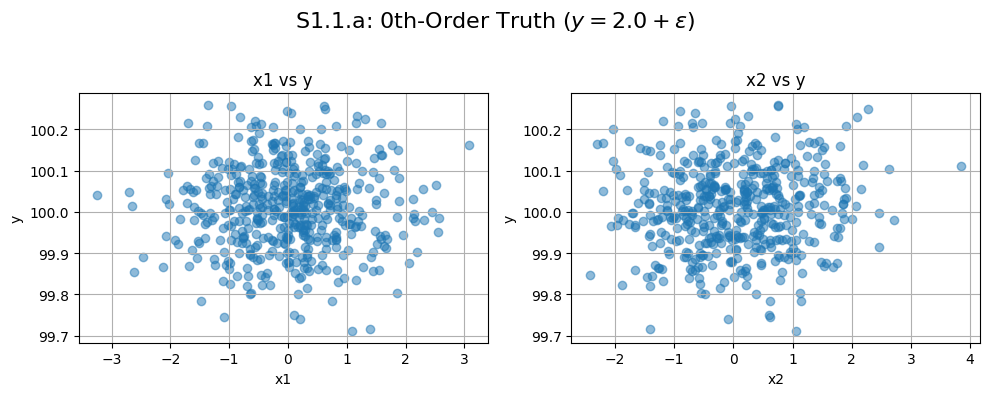

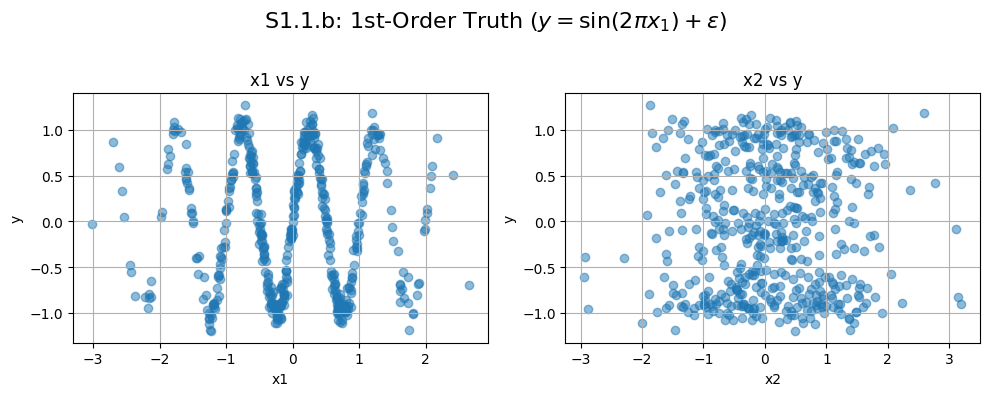

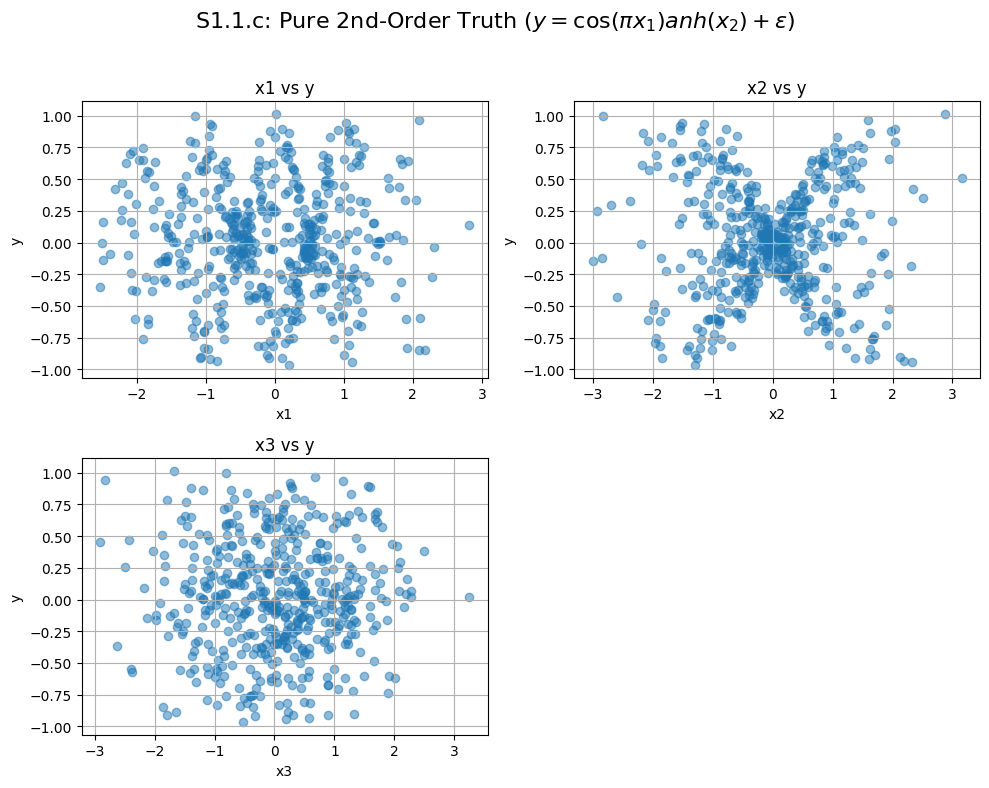

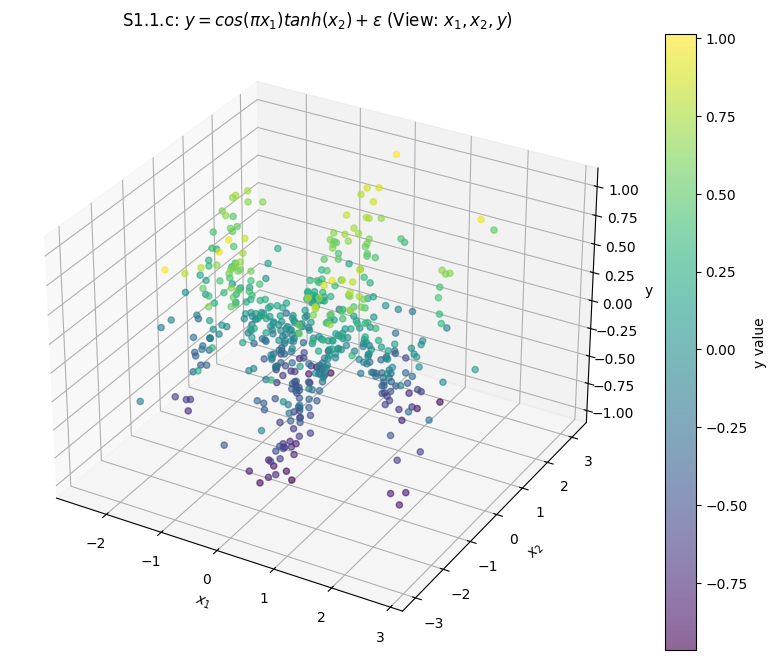

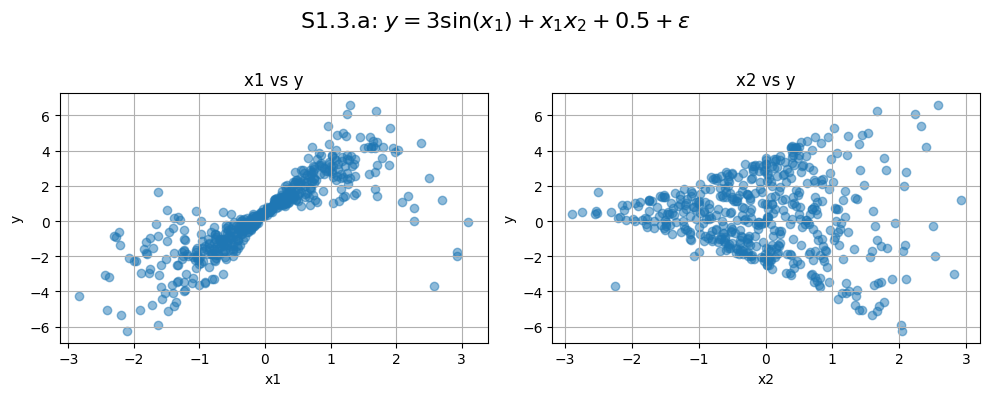

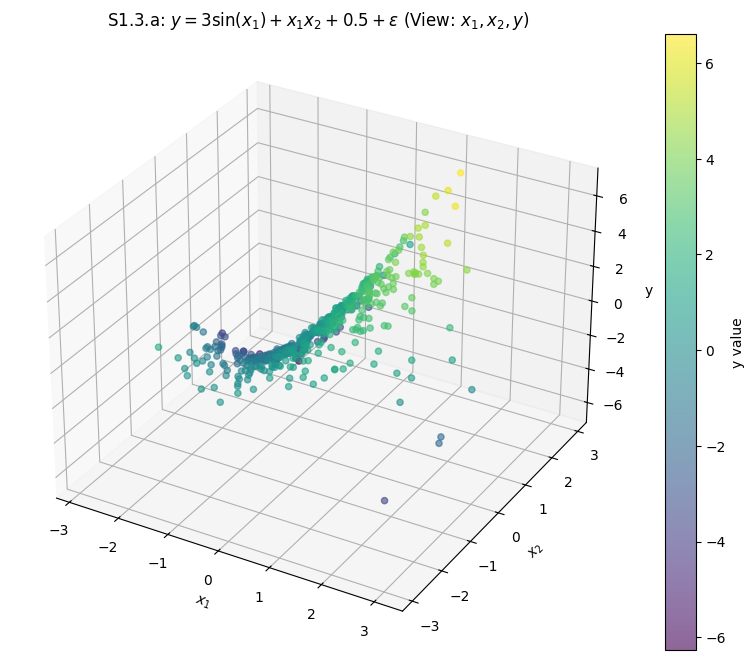

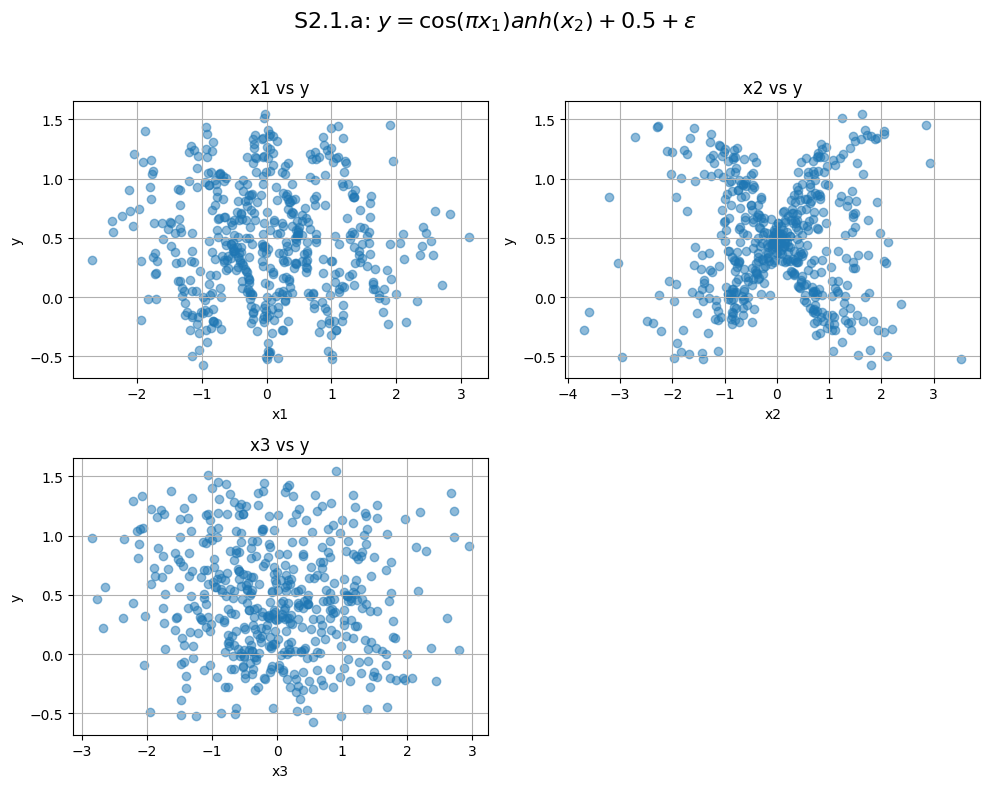

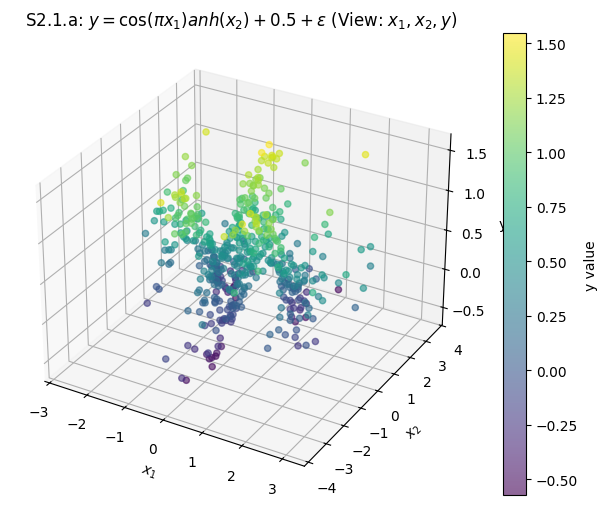

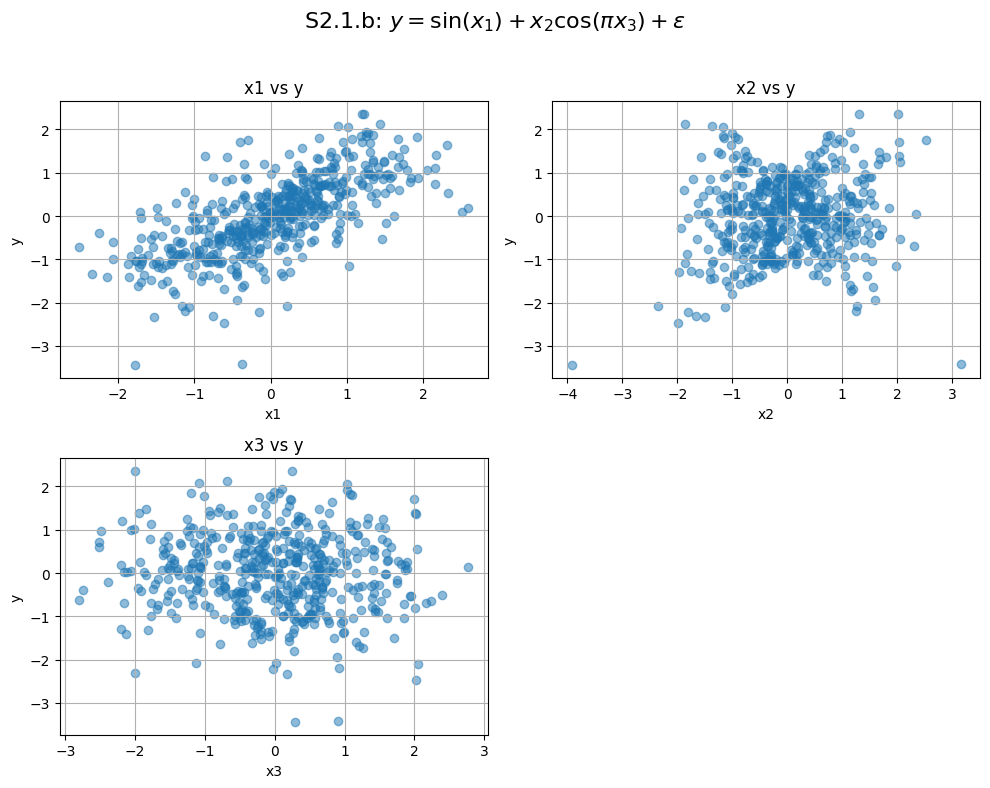

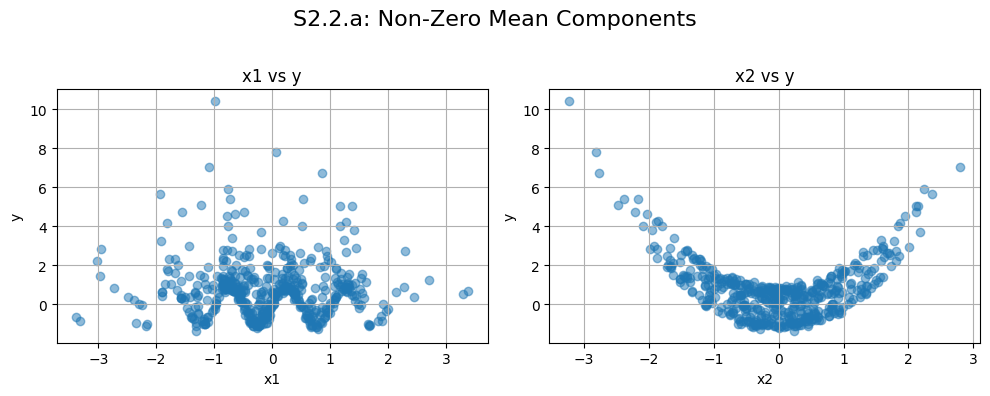

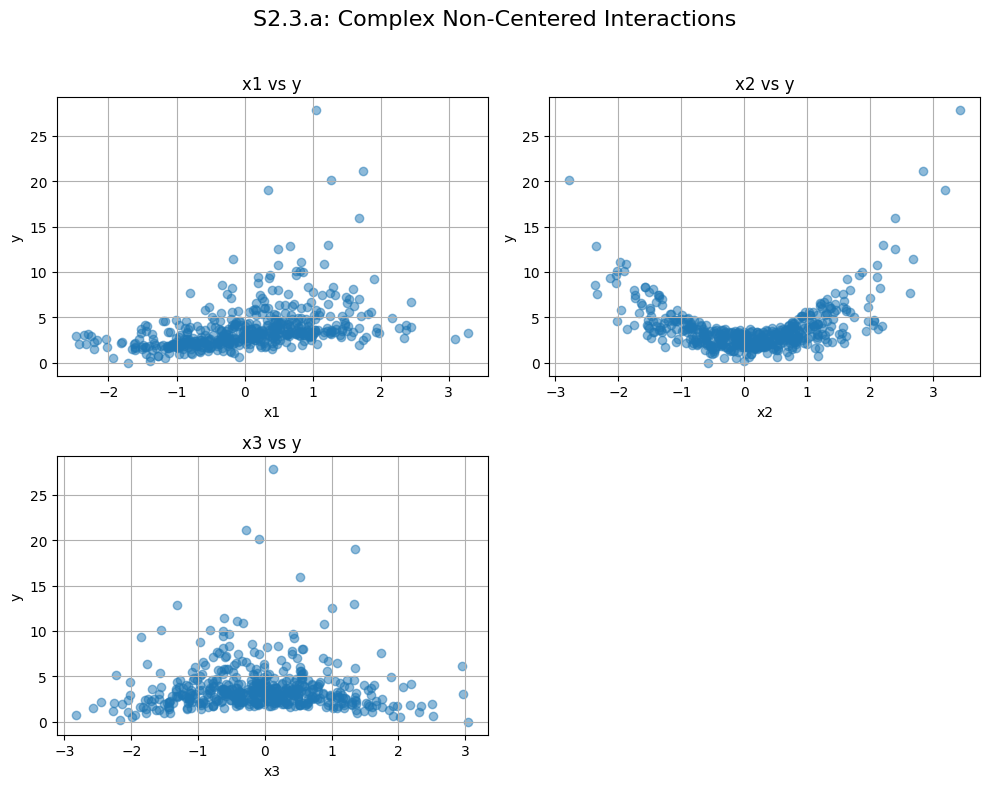

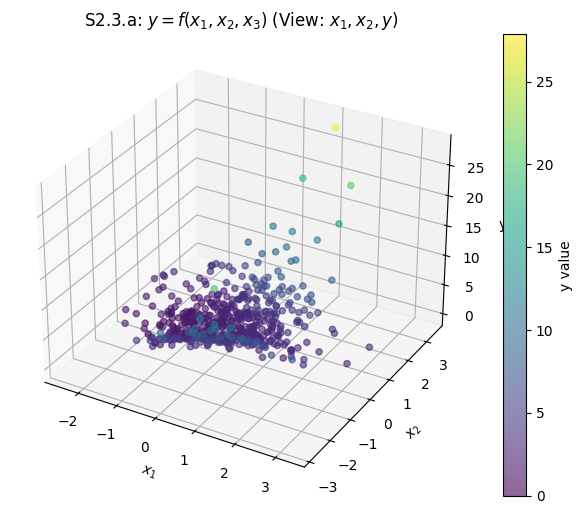

All synthetic datasets generated, saved, and plotted.


In [12]:
# --- Synthetic Dataset Generation and Visualization ---
N_POINTS = 500
NOISE_STD = 0.1
np.random.seed(42) # For reproducibility

# --- Experiment 1.1: The Minimal Function Test ---

# S1.1.a (0th-Order Truth)
D_s1_1_a = 2
X_s1_1_a_features = np.random.normal(0, 1, (N_POINTS, D_s1_1_a))
y_s1_1_a_true = np.full(N_POINTS, 100.0)
y_s1_1_a = y_s1_1_a_true + NOISE_STD * np.random.randn(N_POINTS)
data_s1_1_a = np.column_stack((y_s1_1_a, X_s1_1_a_features))
scipy.io.savemat("data/S_1_1_a_0th_order.mat", {"X": data_s1_1_a})
plot_synthetic_data(data_s1_1_a, "S1.1.a: 0th-Order Truth ($y = 2.0 + \epsilon$)", [f"x{i+1}" for i in range(D_s1_1_a)])

# S1.1.b (1st-Order Truth, Single Active Dim)
D_s1_1_b = 2
X_s1_1_b_features = np.random.normal(0, 1, (N_POINTS, D_s1_1_b))
y_s1_1_b_true = np.sin(2 * np.pi * X_s1_1_b_features[:, 0])
y_s1_1_b = y_s1_1_b_true + NOISE_STD * np.random.randn(N_POINTS)
data_s1_1_b = np.column_stack((y_s1_1_b, X_s1_1_b_features))
scipy.io.savemat("data/S_1_1_b_1st_order_active_x1.mat", {"X": data_s1_1_b})
plot_synthetic_data(data_s1_1_b, "S1.1.b: 1st-Order Truth ($y = \sin(2\pi x_1) + \epsilon$)", [f"x{i+1}" for i in range(D_s1_1_b)])

# S1.1.c (Pure 2nd-Order Truth, Single Interaction)
D_s1_1_c = 3
X_s1_1_c_features = np.random.normal(0, 1, (N_POINTS, D_s1_1_c))
y_s1_1_c_true = np.cos(np.pi * X_s1_1_c_features[:, 0]) * np.tanh(X_s1_1_c_features[:, 1])
y_s1_1_c = y_s1_1_c_true + NOISE_STD * np.random.randn(N_POINTS)
data_s1_1_c = np.column_stack((y_s1_1_c, X_s1_1_c_features))
scipy.io.savemat("data/S_1_1_c_2nd_order_interaction_x1x2.mat", {"X": data_s1_1_c})
plot_synthetic_data(data_s1_1_c, "S1.1.c: Pure 2nd-Order Truth ($y = \cos(\pi x_1) \tanh(x_2) + \epsilon$)", [f"x{i+1}" for i in range(D_s1_1_c)])
fig_s1_1_c = plt.figure(figsize=(10, 8))
ax_s1_1_c = fig_s1_1_c.add_subplot(111, projection='3d')
sc_s1_1_c = ax_s1_1_c.scatter(X_s1_1_c_features[:, 0], X_s1_1_c_features[:, 1], y_s1_1_c, c=y_s1_1_c, cmap='viridis', alpha=0.6)
ax_s1_1_c.set_xlabel('$x_1$')
ax_s1_1_c.set_ylabel('$x_2$')
ax_s1_1_c.set_zlabel('y')
ax_s1_1_c.set_title("S1.1.c: $y = cos(\pi x_1) tanh(x_2) + \epsilon$ (View: $x_1, x_2, y$)")
plt.colorbar(sc_s1_1_c, label='y value')
plt.show()


# --- Experiment 1.3: OAK-Priming ---
# S1.3.a (Mixed 1st and 2nd order for OAK-priming)
D_s1_3_a = 2 # Using D=2 for simpler visualization
X_s1_3_a_features = np.random.normal(0, 1, (N_POINTS, D_s1_3_a))
y_s1_3_a_true = 3*np.sin(X_s1_3_a_features[:, 0]) + X_s1_3_a_features[:, 0] * X_s1_3_a_features[:, 1] + 0.5
y_s1_3_a = y_s1_3_a_true + NOISE_STD * np.random.randn(N_POINTS)
data_s1_3_a = np.column_stack((y_s1_3_a, X_s1_3_a_features))
scipy.io.savemat("data/S_1_3_a_mixed_order_for_priming.mat", {"X": data_s1_3_a})
plot_synthetic_data(data_s1_3_a, "S1.3.a: $y = 3 \sin(x_1) + x_1x_2 + 0.5 + \epsilon$", [f"x{i+1}" for i in range(D_s1_3_a)])
fig_s1_3_a = plt.figure(figsize=(10, 8))
ax_s1_3_a = fig_s1_3_a.add_subplot(111, projection='3d')
sc_s1_3_a = ax_s1_3_a.scatter(X_s1_3_a_features[:, 0], X_s1_3_a_features[:, 1], y_s1_3_a, c=y_s1_3_a, cmap='viridis', alpha=0.6)
ax_s1_3_a.set_xlabel('$x_1$')
ax_s1_3_a.set_ylabel('$x_2$')
ax_s1_3_a.set_zlabel('y')
ax_s1_3_a.set_title("S1.3.a: $y = 3 \sin(x_1) + x_1x_2 + 0.5 + \epsilon$ (View: $x_1, x_2, y$)")
plt.colorbar(sc_s1_3_a, label='y value')
plt.show()


# --- Experiment 2.1: Order-Wise MI Penalty ---
# S2.1.a (Low-Order Truth - same as S1.1.c but with explicit bias for clarity here)
D_s2_1_a = 3
X_s2_1_a_features = np.random.normal(0, 1, (N_POINTS, D_s2_1_a))
y_s2_1_a_true = np.cos(np.pi * X_s2_1_a_features[:, 0]) * np.tanh(X_s2_1_a_features[:, 1]) + 0.5 # Added bias
y_s2_1_a = y_s2_1_a_true + NOISE_STD * np.random.randn(N_POINTS)
data_s2_1_a = np.column_stack((y_s2_1_a, X_s2_1_a_features))
scipy.io.savemat("data/S_2_1_a_low_order_bias.mat", {"X": data_s2_1_a})
plot_synthetic_data(data_s2_1_a, "S2.1.a: $y = \cos(\pi x_1)\tanh(x_2) + 0.5 + \epsilon$", [f"x{i+1}" for i in range(D_s2_1_a)])
fig_s2_1_a = plt.figure(figsize=(8, 6))
ax_s2_1_a = fig_s2_1_a.add_subplot(111, projection='3d')
sc_s2_1_a = ax_s2_1_a.scatter(X_s2_1_a_features[:, 0], X_s2_1_a_features[:, 1], y_s2_1_a, c=y_s2_1_a, cmap='viridis', alpha=0.6)
ax_s2_1_a.set_xlabel('$x_1$')
ax_s2_1_a.set_ylabel('$x_2$')
ax_s2_1_a.set_zlabel('y')
ax_s2_1_a.set_title("S2.1.a: $y = \cos(\pi x_1)\tanh(x_2) + 0.5 + \epsilon$ (View: $x_1, x_2, y$)")
plt.colorbar(sc_s2_1_a, label='y value')
plt.show()

# S2.1.b (Mixed-Order Truth, but Sparse)
D_s2_1_b = 3
X_s2_1_b_features = np.random.normal(0, 1, (N_POINTS, D_s2_1_b))
y_s2_1_b_true = np.sin(X_s2_1_b_features[:, 0]) + X_s2_1_b_features[:, 1] * np.cos(np.pi* X_s2_1_b_features[:, 2]) # x1 main, x2x3 interaction
y_s2_1_b = y_s2_1_b_true + NOISE_STD * np.random.randn(N_POINTS)
data_s2_1_b = np.column_stack((y_s2_1_b, X_s2_1_b_features))
scipy.io.savemat("data/S_2_1_b_mixed_sparse_order.mat", {"X": data_s2_1_b})
plot_synthetic_data(data_s2_1_b, "S2.1.b: $y = \sin(x_1) + x_2\cos(\pi x_3) + \epsilon$", [f"x{i+1}" for i in range(D_s2_1_b)])
# For S2.1.b, a single 3D plot is less intuitive for x2*cos(x3). Marginal plots are primary.
# Consider specific 2D contour/surface plots of the x2,x3 interaction if needed later.


# --- Experiment 2.2: Base-Component Mean MI Penalty ---
# S2.2.a (Non-Zero Mean Components)
D_s2_2_a = 2
X_s2_2_a_features = np.random.normal(0, 1, (N_POINTS, D_s2_2_a))
# For x ~ N(0,1), E[x^2] = Var(x) + E[x]^2 = 1 + 0 = 1
E_x2_sq = 1.0
g1_s2_2_a = np.sin(2 * np.pi * X_s2_2_a_features[:, 0]) # True centered g1
g2_s2_2_a = X_s2_2_a_features[:, 1]**2 - E_x2_sq      # True centered g2
y_s2_2_a_true = 0.5 + (g1_s2_2_a + 0.7) + (g2_s2_2_a - 0.4) # True global bias = 0.5 + 0.7 - 0.4 = 0.8
y_s2_2_a = y_s2_2_a_true + NOISE_STD * np.random.randn(N_POINTS)
data_s2_2_a = np.column_stack((y_s2_2_a, X_s2_2_a_features))
scipy.io.savemat("data/S_2_2_a_non_zero_means.mat", {"X": data_s2_2_a})
plot_synthetic_data(data_s2_2_a, "S2.2.a: Non-Zero Mean Components", [f"x{i+1}" for i in range(D_s2_2_a)])


# --- Experiment 2.3: Combined MI Penalties ---
# S2.3.a (Complex Interaction with Non-Centered Terms)
D_s2_3_a = 3
X_s2_3_a_features = np.random.normal(0, 1, (N_POINTS, D_s2_3_a))
x1_s2_3_a, x2_s2_3_a, x3_s2_3_a = X_s2_3_a_features[:,0], X_s2_3_a_features[:,1], X_s2_3_a_features[:,2]
# Components before recentering:
g1_raw = np.sin(x1_s2_3_a) + 0.5
g2_raw = x2_s2_3_a**2 - 0.2
g3_raw = np.cos(x3_s2_3_a) - 0.1
interaction_raw = 0.8 * g1_raw * g2_raw
y_s2_3_a_true = 1.5 + g1_raw + g2_raw + g3_raw + interaction_raw
y_s2_3_a = y_s2_3_a_true + NOISE_STD * np.random.randn(N_POINTS)
data_s2_3_a = np.column_stack((y_s2_3_a, X_s2_3_a_features))
scipy.io.savemat("data/S_2_3_a_complex_non_centered.mat", {"X": data_s2_3_a})
plot_synthetic_data(data_s2_3_a, "S2.3.a: Complex Non-Centered Interactions", [f"x{i+1}" for i in range(D_s2_3_a)])
# 3D scatter for the main interaction drivers x1, x2 vs y
fig_s2_3_a = plt.figure(figsize=(8, 6))
ax_s2_3_a = fig_s2_3_a.add_subplot(111, projection='3d')
sc_s2_3_a = ax_s2_3_a.scatter(x1_s2_3_a, x2_s2_3_a, y_s2_3_a, c=y_s2_3_a, cmap='viridis', alpha=0.6)
ax_s2_3_a.set_xlabel('$x_1$')
ax_s2_3_a.set_ylabel('$x_2$')
ax_s2_3_a.set_zlabel('y')
ax_s2_3_a.set_title("S2.3.a: $y = f(x_1,x_2,x_3)$ (View: $x_1, x_2, y$)")
plt.colorbar(sc_s2_3_a, label='y value')
plt.show()

print("All synthetic datasets generated, saved, and plotted.")

# 10. Measure comparisons

Comparing direct gaussians and non-gaussians with same statistical moments

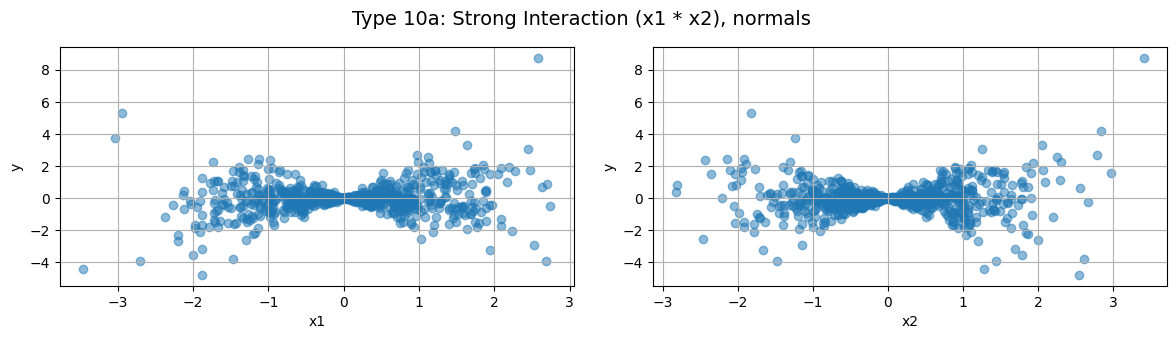

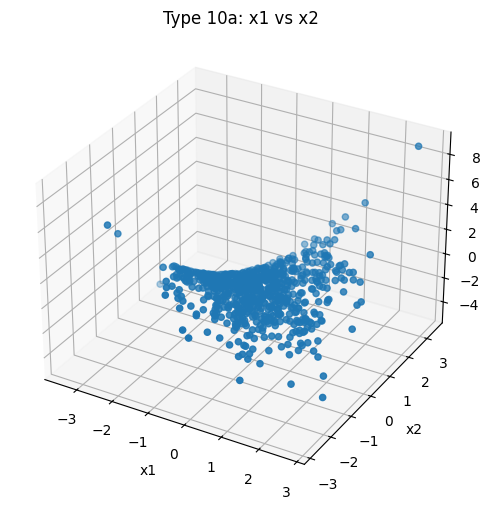

In [42]:
# --- 10a. suspect that type 2 results may be to do with symmetry and 0 mean constraints, so we try and use asymetric functions ---
# x_1 = np.random.uniform(0, 2, 500)
x_1 = np.random.normal(loc=0, scale=1, size=750)
x_2 = np.random.normal(loc=0., scale=1, size=750)

y = x_1 * x_2 # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type10a.mat", {"X": X})

plot_synthetic_data(X, "Type 10a: Strong Interaction (x1 * x2), normals", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 10a: x1 vs x2")
plt.show()


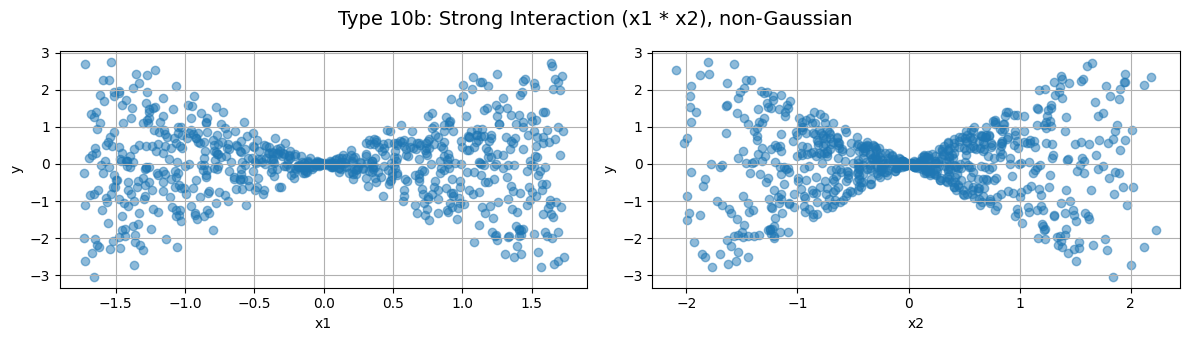

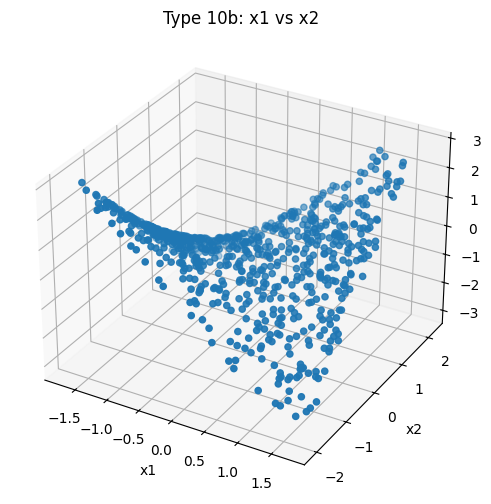

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# --- 10b. Generate dataset with same moments as Type 10a but from non-Gaussian distributions ---

# Target mean and variance (from Type 10a)
target_mean = 0
target_variance = 1

# Uniform distribution (shifted and scaled to match mean/variance)
x_1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
x_2 = np.random.beta(2, 2, 750)  # Beta distribution (rescale to match mean and variance)

# Rescale Beta to have mean 0 and variance 1 (optional if you want perfect matching)
x_2 = (x_2 - np.mean(x_2)) / np.std(x_2)  # Normalize to mean 0, variance 1

y = x_1 * x_2  # Strong interaction term (same as before)

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type10b.mat", {"X": X})

plot_synthetic_data(X, "Type 10b: Strong Interaction (x1 * x2), non-Gaussian", ["x1", "x2"])

# Plot 3D scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 10b: x1 vs x2")
plt.show()


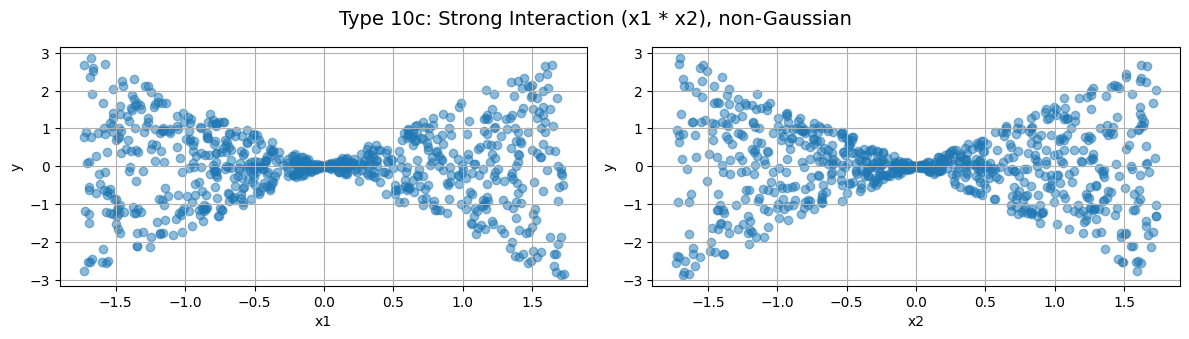

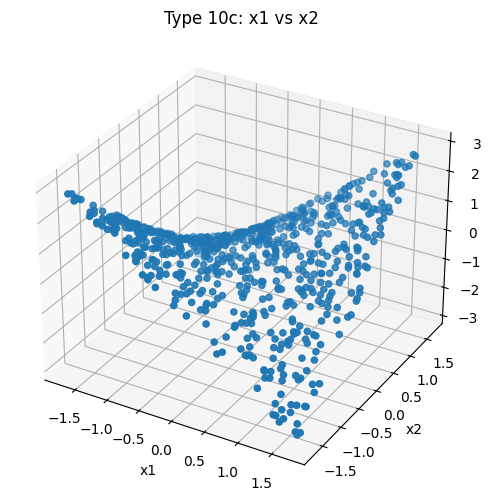

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# --- 10c. Generate dataset with same moments as Type 10a but from non-Gaussian distributions (only uniform now) ---

# Target mean and variance (from Type 10a)
target_mean = 0
target_variance = 1

# Uniform distribution (shifted and scaled to match mean/variance)
x_1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
x_2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1

y = x_1 * x_2  # Strong interaction term (same as before)

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type10c.mat", {"X": X})

plot_synthetic_data(X, "Type 10c: Strong Interaction (x1 * x2), non-Gaussian", ["x1", "x2"])

# Plot 3D scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 10c: x1 vs x2")
plt.show()


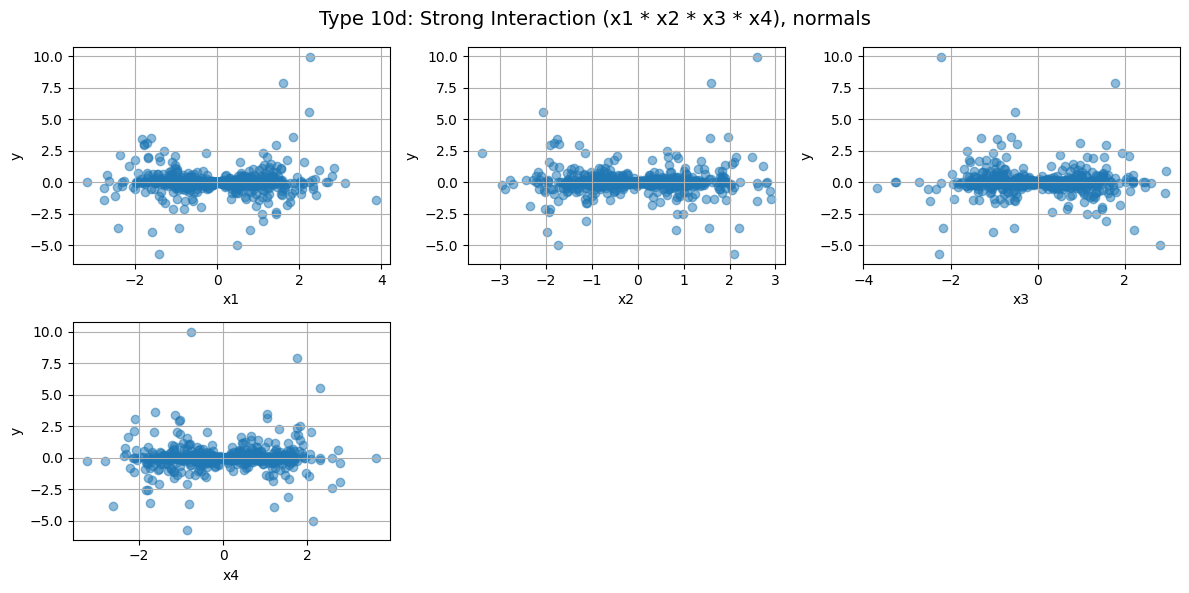

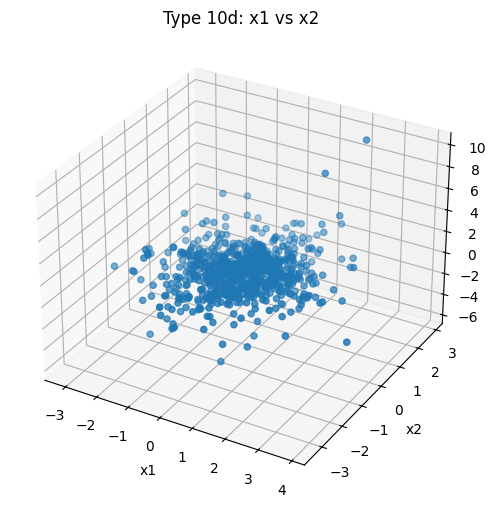

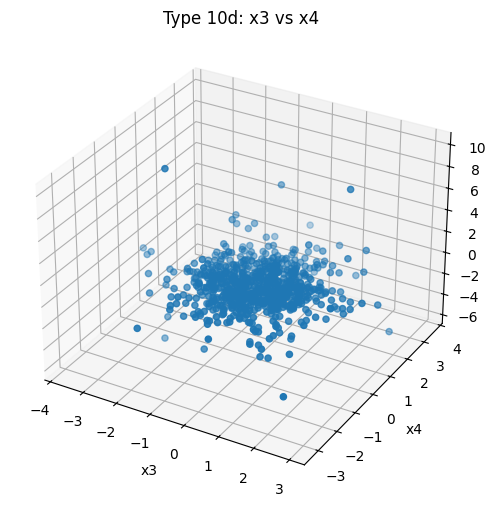

In [45]:
# --- 10d. suspect that type 2 results may be to do with symmetry and 0 mean constraints, so we try and use asymetric functions ---
# x_1 = np.random.uniform(0, 2, 500)
x_1 = np.random.normal(loc=0, scale=1, size=750)
x_2 = np.random.normal(loc=0., scale=1, size=750)
x_3 = np.random.normal(loc=0., scale=1, size=750)
x_4 = np.random.normal(loc=0., scale=1, size=750)




y = x_1 * x_2 * x_3 * x_4 # Strong interaction term

X = np.column_stack((y, x_1, x_2, x_3, x_4))
scipy.io.savemat("data/synthetic_behaviour_type10d.mat", {"X": X})

plot_synthetic_data(X, "Type 10d: Strong Interaction (x1 * x2 * x3 * x4), normals", ["x1", "x2", "x3", "x4"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 10d: x1 vs x2")
plt.show()

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 3], X[:, 4], X[:, 0])
ax.set_xlabel('x3')
ax.set_ylabel('x4')
ax.set_zlabel('y')
plt.title("Type 10d: x3 vs x4")
plt.show()

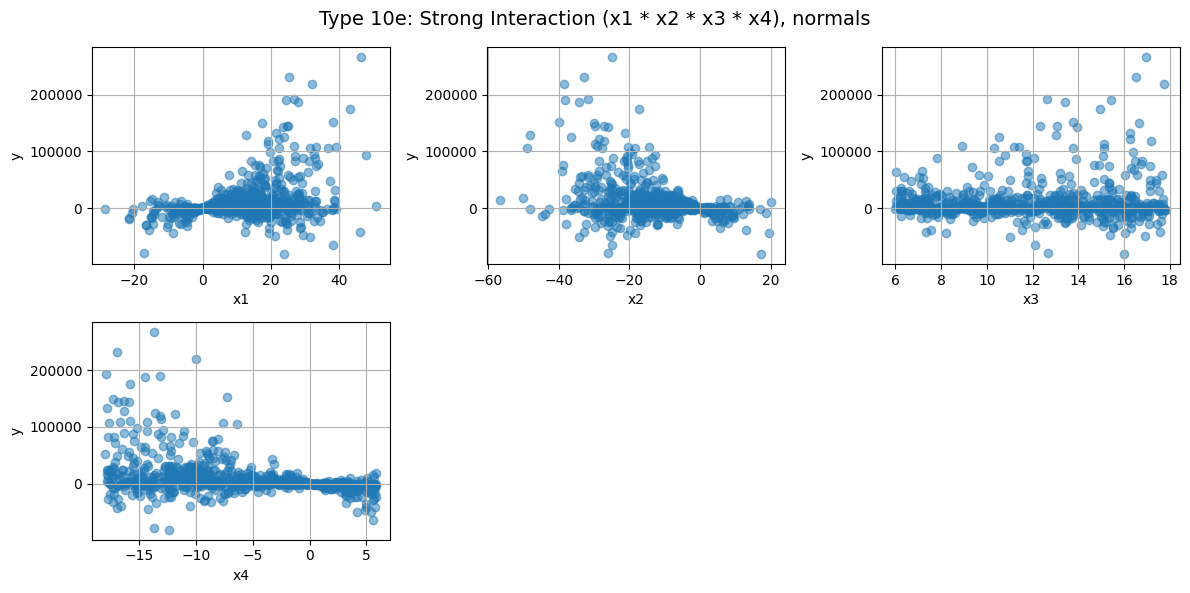

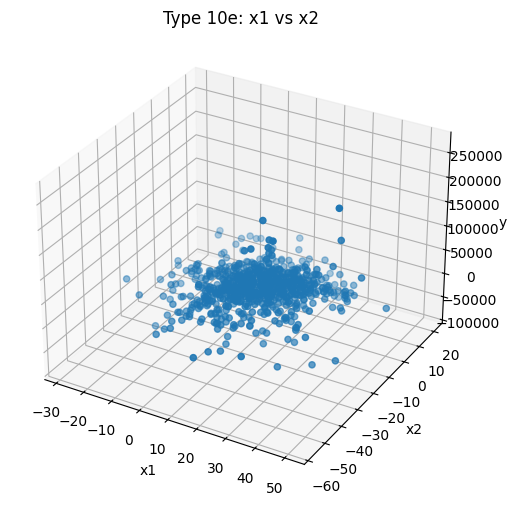

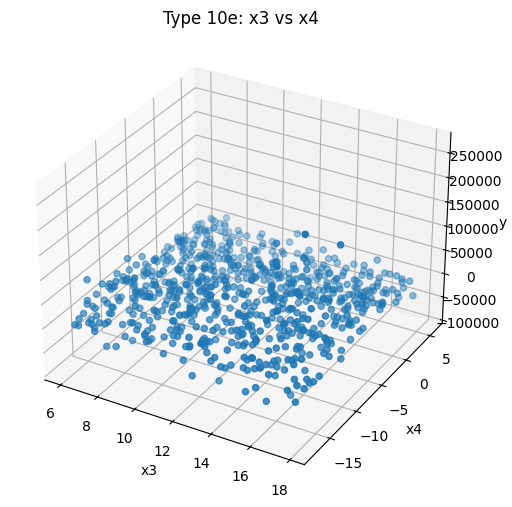

In [75]:
# --- 10e. suspect that type 2 results may be to do with symmetry and 0 mean constraints, so we try and use asymetric functions ---

# mostly 4th sobol order contributions 
# x_1 = np.random.normal(loc=0, scale=1, size=750)
# x_2 = np.random.normal(loc=0., scale=1, size=750)
# x_3 = np.random.normal(loc=0., scale=1, size=750)
# x_4 = np.random.normal(loc=0., scale=1, size=750)

# mostly 4th sobol order contributions 
# x_1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
# x_2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
# x_3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
# x_4 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1

# mostly 2nd but still mixed sobol order contributions 
x_1 = np.random.normal(loc=12, scale=12, size=750) # mean 12, variance 12
x_2 = np.random.normal(loc=-12, scale=12, size=750) # mean 12, variance 12
x_3 = np.random.uniform(6,18, 750)  # Uniform with mean 12 and variance 12
x_4 = np.random.uniform(-18,6, 750)  # Uniform with mean 12 and variance 12

# mostly 4th sobol order contributions 
# x_1 = np.random.normal(loc=0, scale=1, size=750)
# x_2 = np.random.normal(loc=0., scale=1, size=750)
# x_3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1
# x_4 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # Uniform with mean 0 and variance 1

# mostly 1st order sobol indices contributions
# x_1 = np.random.uniform(-6,-3, 750)  # Uniform with mean 0 and variance 1
# x_2 = np.random.uniform(-3,0, 750)  # Uniform with mean 0 and variance 1
# x_3 = np.random.uniform(0,3, 750)  # Uniform with mean 0 and variance 1
# x_4 = np.random.uniform(3,6, 750)  # Uniform with mean 0 and variance 1

# very mixed order sobol indices contributions
# x_1 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)  # Uniform with mean 1 and variance 1
# x_2 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)  # Uniform with mean 1 and variance 1
# x_3 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)  # Uniform with mean 1 and variance 1
# x_4 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)  # Uniform with mean 1 and variance 1

# mostly 1st order sobol indices contributions
# x_1 = np.random.uniform(0,12, 750)  # Uniform with mean 6 and variance 12
# x_2 = np.random.uniform(0,12, 750)  # Uniform with mean 6 and variance 12
# x_3 = np.random.uniform(0,12, 750)  # Uniform with mean 6 and variance 12
# x_4 = np.random.uniform(0,12, 750)  # Uniform with mean 6 and variance 12

# mostly 4th order sobol indices contributions
# x_1 = np.random.uniform(-6,6, 750)  # Uniform with mean 0 and variance 12
# x_2 = np.random.uniform(-6,6, 750)  # Uniform with mean 0 and variance 12
# x_3 = np.random.uniform(-6,6, 750)  # Uniform with mean 0 and variance 12
# x_4 = np.random.uniform(-6,6, 750)  # Uniform with mean 0 and variance 12

# mostly 1st order sobol indices contributions
# x_1 = np.random.uniform(6,18, 750)  # Uniform with mean 12 and variance 12
# x_2 = np.random.uniform(6,18, 750)  # Uniform with mean 12 and variance 12
# x_3 = np.random.uniform(6,18, 750)  # Uniform with mean 12 and variance 12
# x_4 = np.random.uniform(6,18, 750)  # Uniform with mean 12 and variance 12



y = x_1 * x_2 * x_3 * x_4 # Strong interaction term

X = np.column_stack((y, x_1, x_2, x_3, x_4))
scipy.io.savemat("data/synthetic_behaviour_type10e.mat", {"X": X})

plot_synthetic_data(X, "Type 10e: Strong Interaction (x1 * x2 * x3 * x4), normals", ["x1", "x2", "x3", "x4"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 10e: x1 vs x2")
plt.show()

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 3], X[:, 4], X[:, 0])
ax.set_xlabel('x3')
ax.set_ylabel('x4')
ax.set_zlabel('y')
plt.title("Type 10e: x3 vs x4")
plt.show()

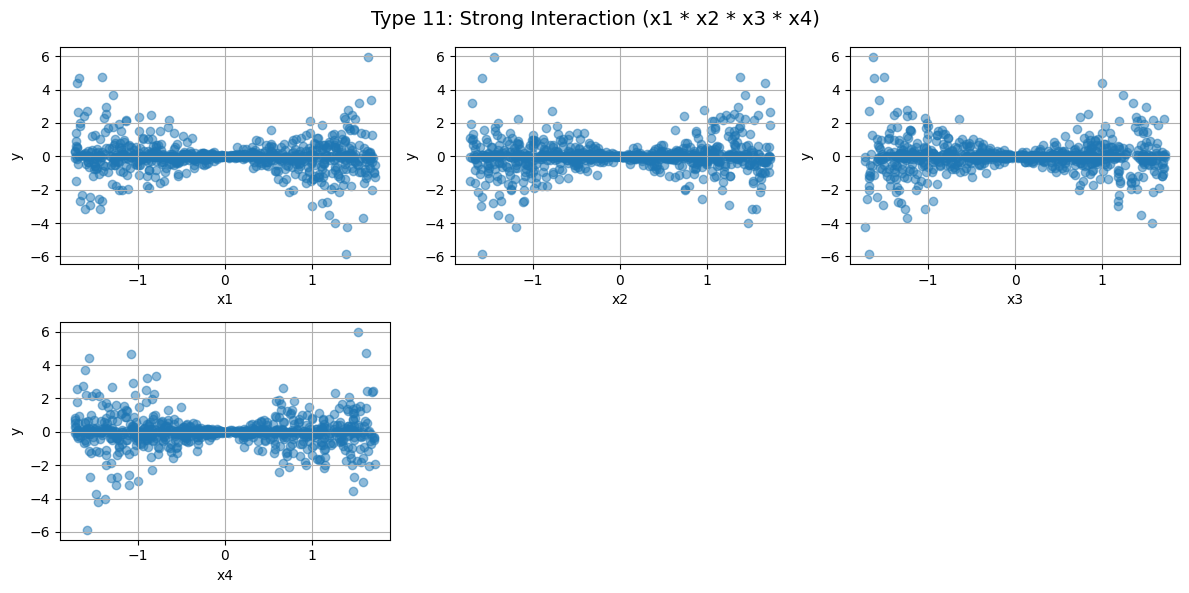

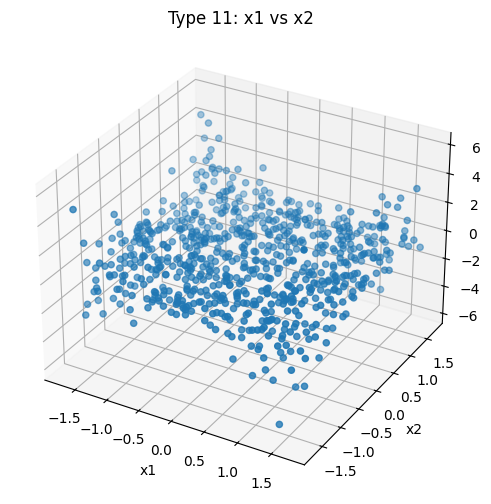

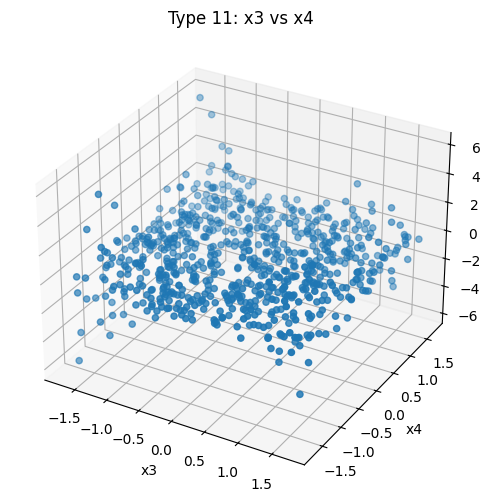

In [6]:
# --- 11. grid like exploration of means, variances, symmetries, shapes ---


# mostly 4th order Sobol contributions, centered normal, low variance
# x_1 = np.random.normal(loc=0, scale=1, size=750)
# x_2 = np.random.normal(loc=0, scale=1, size=750)
# x_3 = np.random.normal(loc=0, scale=1, size=750)
# x_4 = np.random.normal(loc=0, scale=1, size=750)

# # mostly 4th order Sobol contributions, centered normal, high variance
# x_1 = np.random.normal(loc=0, scale=12, size=750)
# x_2 = np.random.normal(loc=0, scale=12, size=750)
# x_3 = np.random.normal(loc=0, scale=12, size=750)
# x_4 = np.random.normal(loc=0, scale=12, size=750)

# # mostly 4th order Sobol contributions, shifted normal, low variance
# x_1 = np.random.normal(loc=6, scale=1, size=750)
# x_2 = np.random.normal(loc=6, scale=1, size=750)
# x_3 = np.random.normal(loc=6, scale=1, size=750)
# x_4 = np.random.normal(loc=6, scale=1, size=750)

# # mostly 4th order Sobol contributions, shifted normal, high variance
# x_1 = np.random.normal(loc=6, scale=12, size=750)
# x_2 = np.random.normal(loc=6, scale=12, size=750)
# x_3 = np.random.normal(loc=6, scale=12, size=750)
# x_4 = np.random.normal(loc=6, scale=12, size=750)

# # mostly 4th order Sobol contributions, centered uniform, low variance
x_1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # mean 0, variance 1
x_2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)  # mean 0, variance 1
x_3 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)
x_4 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 750)

# # mostly 4th order Sobol contributions, centered uniform, high variance
# x_1 = np.random.uniform(-6, 6, 750)  # mean 0, variance 12
# x_2 = np.random.uniform(-6, 6, 750)
# x_3 = np.random.uniform(-6, 6, 750)
# x_4 = np.random.uniform(-6, 6, 750)

# mostly 4th order Sobol contributions, shifted uniform, low variance
# x_1 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)  # mean 1, variance 1
# x_2 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)
# x_3 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)
# x_4 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), 750)

# # mostly 4th order Sobol contributions, shifted uniform, high variance
# x_1 = np.random.uniform(6, 18, 750)  # mean 12, variance 12
# x_2 = np.random.uniform(6, 18, 750)
# x_3 = np.random.uniform(6, 18, 750)
# x_4 = np.random.uniform(6, 18, 750)

# # mixed 4th order Sobol contributions, mixed distribution (normal + uniform)
# x_1 = np.random.normal(loc=12, scale=12, size=750)  # mean 12, variance 12
# x_2 = np.random.normal(loc=-12, scale=12, size=750)  # mean -12, variance 12
# x_3 = np.random.uniform(6, 18, 750)  # mean 12, variance 12
# x_4 = np.random.uniform(-18, -6, 750)  # mean -12, variance 12

# # mostly 4th order Sobol contributions, symmetric beta (scaled to variance 1)
# x_1 = np.random.beta(2, 2, 750)
# x_1 = (x_1 - np.mean(x_1)) / np.std(x_1)  # rescale to mean 0, variance 1
# x_2 = np.random.beta(2, 2, 750)
# x_2 = (x_2 - np.mean(x_2)) / np.std(x_2)
# x_3 = np.random.beta(2, 2, 750)
# x_3 = (x_3 - np.mean(x_3)) / np.std(x_3)
# x_4 = np.random.beta(2, 2, 750)
# x_4 = (x_4 - np.mean(x_4)) / np.std(x_4)

# # mostly 4th order Sobol contributions, asymmetric beta (skewed to the left)
# x_1 = np.random.beta(2, 5, 750)
# x_1 = (x_1 - np.mean(x_1)) / np.std(x_1)  # rescale to mean 0, variance 1
# x_2 = np.random.beta(2, 5, 750)
# x_2 = (x_2 - np.mean(x_2)) / np.std(x_2)
# x_3 = np.random.beta(2, 5, 750)
# x_3 = (x_3 - np.mean(x_3)) / np.std(x_3)
# x_4 = np.random.beta(2, 5, 750)
# x_4 = (x_4 - np.mean(x_4)) / np.std(x_4)



y = x_1 * x_2 * x_3 * x_4 # Strong interaction term
y_2 = x_1 * x_2 * x_3 * (1+x_4)

X = np.column_stack((y, x_1, x_2, x_3, x_4))
scipy.io.savemat("data/synthetic_behaviour_type11.mat", {"X": X})

X2 = np.column_stack((y_2, x_1, x_2, x_3, x_4))
scipy.io.savemat("data/synthetic_behaviour_type11b.mat", {"X": X2})


plot_synthetic_data(X, "Type 11: Strong Interaction (x1 * x2 * x3 * x4)", ["x1", "x2", "x3", "x4"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 11: x1 vs x2")
plt.show()

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 3], X[:, 4], X[:, 0])
ax.set_xlabel('x3')
ax.set_ylabel('x4')
ax.set_zlabel('y')
plt.title("Type 11: x3 vs x4")
plt.show()


## **0. Used for testing formats and interactions**

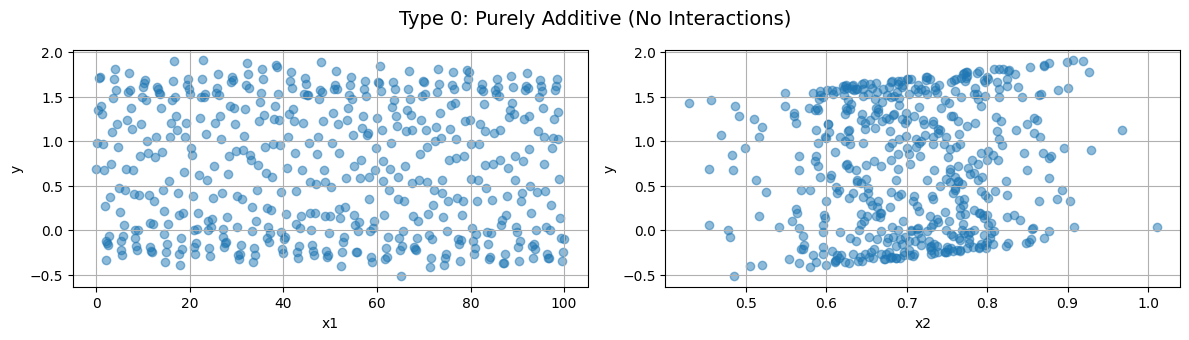

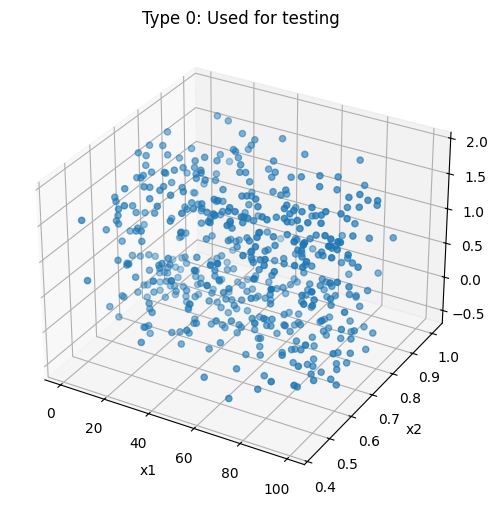

In [47]:
import numpy as np
import scipy.io

# Generate x_i values
x_1 = np.arange(0, 100.2, 0.2)
x_2 = np.random.normal(loc=0.7, scale=0.1, size=len(x_1))


# Generate y values
y = np.sin(2 * x_1) + x_2

# Create X matrix (features)
X = np.column_stack((y, x_1, x_2))  # Stack features as a 2D matrix, as is expected in `load_regression_dataset``

# Save as a MATLAB binary file (v5 format)
scipy.io.savemat("data/synthetic_behaviour_type0.mat", {"X": X})
plot_synthetic_data(X, "Type 0: Purely Additive (No Interactions)", ["x1", "x2", "x3"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 0: Used for testing")
plt.show()




In [48]:
print("Feature standard deviations:", np.std(X, axis=0)) # note that having a feature of 0 std causes nan errors as std = 0 and normalising divides by std


Feature standard deviations: [ 0.70914752 28.92519087  0.09619622]




## **1. Purely Additive Function (No Interactions)**
- **Formula:** $y = f_1(x_1) + f_2(x_2) + f_3(x_3) + \epsilon$
- **Expected Behavior:** Both OAK and Additive GP should perform similarly since there are no interaction terms.

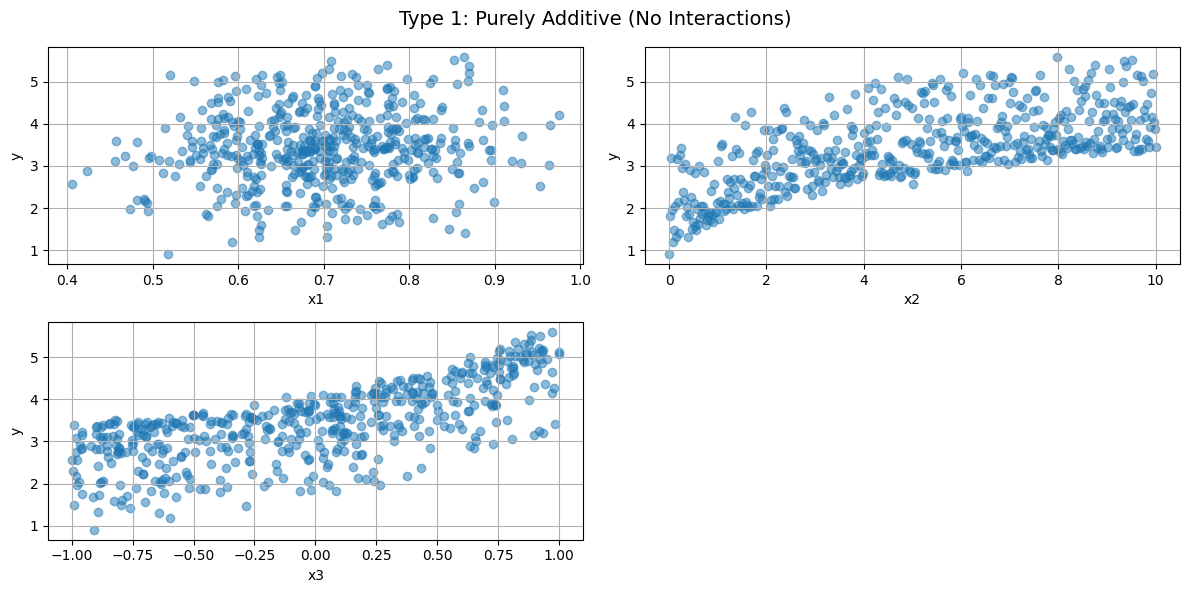

In [49]:
# --- 1. Purely Additive Function (No Interactions) ---
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.linspace(0, 10, len(x_1))
x_3 = np.random.uniform(-1, 1, size=len(x_1))

y = np.sin(x_1) + np.log(1 + x_2) + np.exp(x_3)

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type1.mat", {"X": X})

plot_synthetic_data(X, "Type 1: Purely Additive (No Interactions)", ["x1", "x2", "x3"])


## **2. Strong Interaction Between Features**
- **Formula:** $y = x_1 \cdot x_2$
- **Expected Behavior:** As there is only an interaction term, both capture the interaction only.

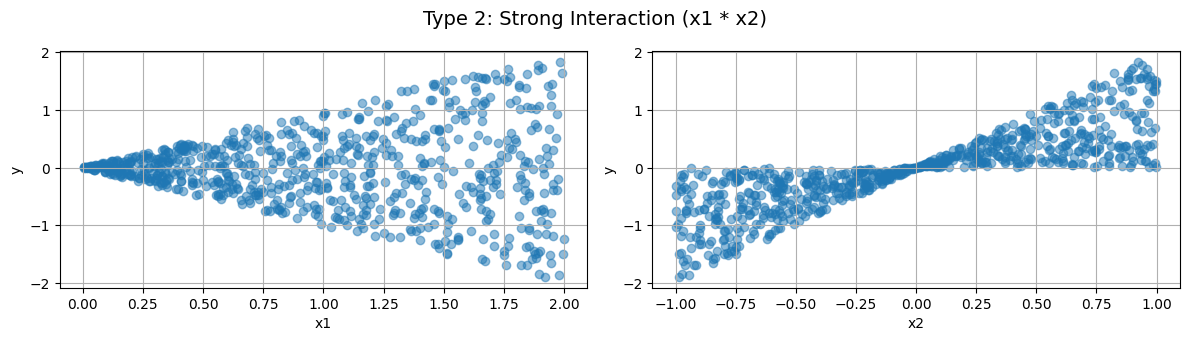

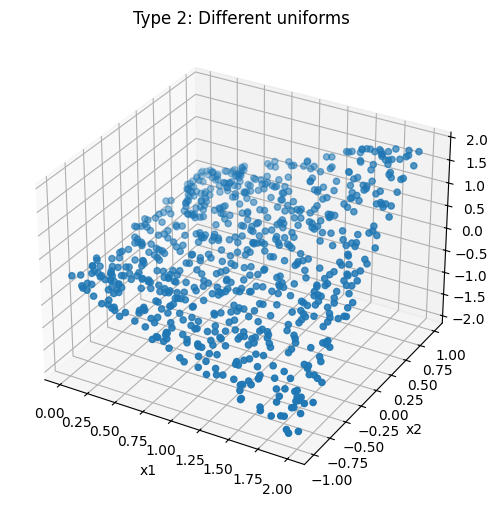

In [3]:
# --- 2. Strong Interaction Between Features ---
x_1 = np.random.uniform(0, 2, 750)
x_2 = np.random.uniform(-1, 1, 750)

y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2.mat", {"X": X})

plot_synthetic_data(X, "Type 2: Strong Interaction (x1 * x2)", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 2: Different uniforms")
plt.show()

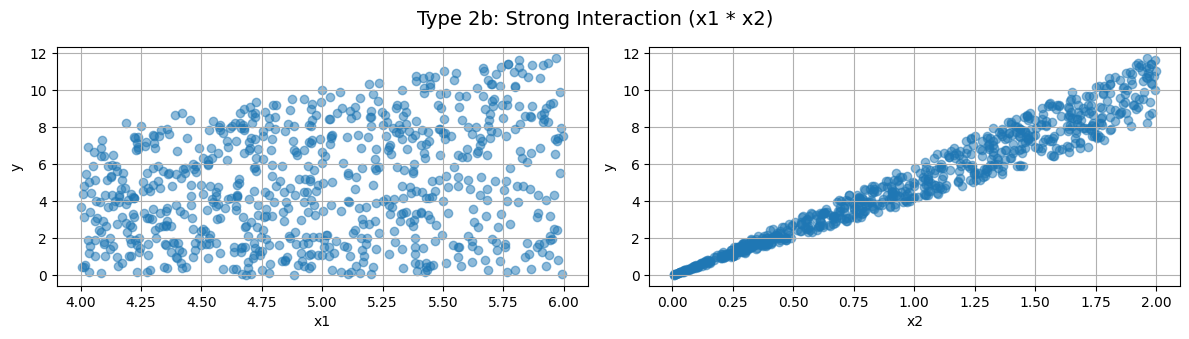

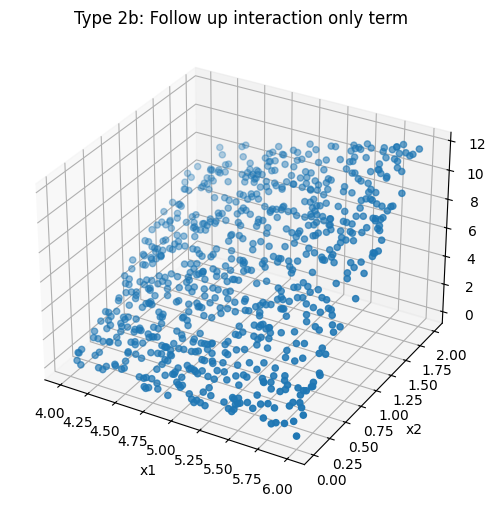

In [ ]:
# --- 2. Strong Interaction Between Features follow up with more datapoints and no negative side ---
x_1 = np.random.uniform(4, 6, 750)
x_2 = np.random.uniform(0, 2, 750)

y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2b.mat", {"X": X})

plot_synthetic_data(X, "Type 2b: Strong Interaction (x1 * x2)", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 2b: Follow up interaction only term")
plt.show()

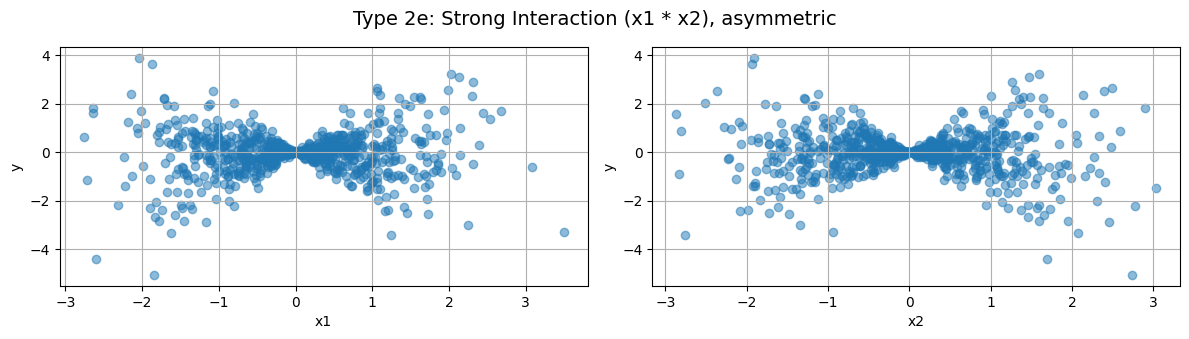

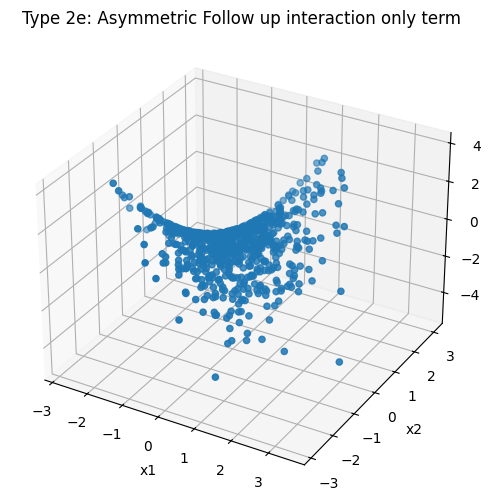

In [4]:
# --- 2e. suspect that type 2 results may be to do with symmetry and 0 mean constraints, so we try and use asymetric functions ---
# x_1 = np.random.uniform(0, 2, 500)
x_1 = np.random.normal(loc=0, scale=1, size=750)
x_2 = np.random.normal(loc=0., scale=1, size=750)


y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2e.mat", {"X": X})

plot_synthetic_data(X, "Type 2e: Strong Interaction (x1 * x2), asymmetric", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 2e: Asymmetric Follow up interaction only term")
plt.show()

## **3. Sparse Dependency on Features**
- **Formula:** $y = \sin(x_1) + \log(1 + x_3) + \epsilon$
- **Expected Behavior:** OAK should assign high importance to \( x_1 \) and \( x_3 \) while ignoring other irrelevant features.

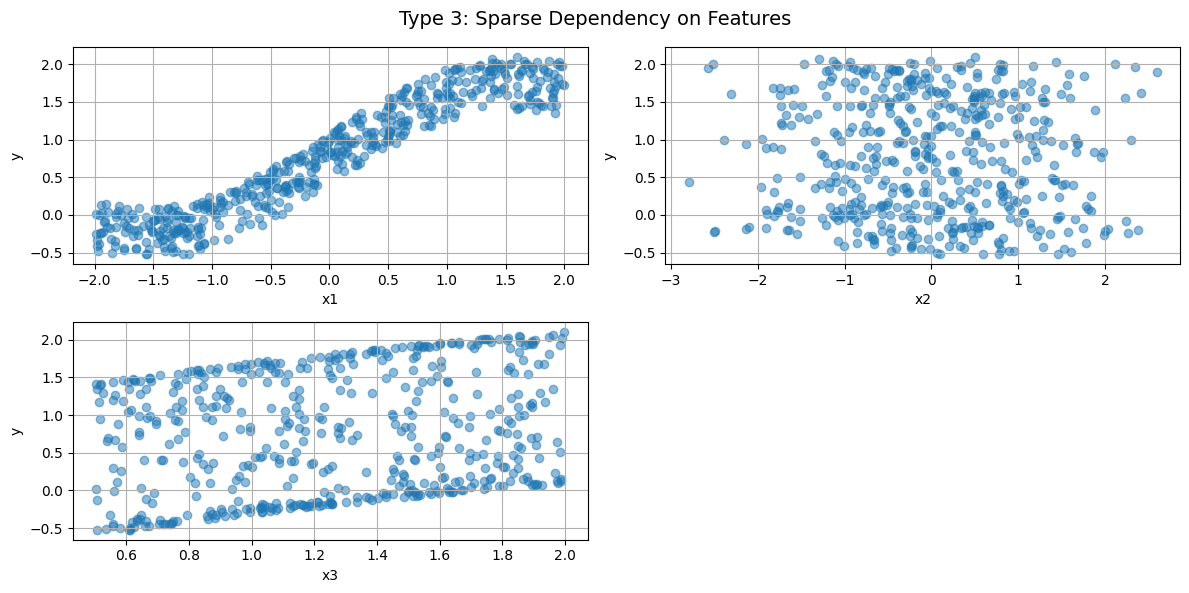

In [ ]:
# --- 3. Sparse Dependency on Features ---
x_1 = np.random.uniform(-2, 2, 500)
x_2 = np.random.normal(0, 1, 500)
x_3 = np.random.uniform(0.5, 2, 500)

y = np.sin(x_1) + np.log(1 + x_3)  # Only depends on x_1 and x_3

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type3.mat", {"X": X})

plot_synthetic_data(X, "Type 3: Sparse Dependency on Features", ["x1", "x2", "x3"])



## **4. Low-Dimensional Interactions with High-Dimensional Input**
- **Formula:** $y = f(x_1, x_2) + f(x_3), \quad f(x_1, x_2) = \sin(x_1) \cos(x_2)$
- **Expected Behavior:** OAK should correctly identify and separate lower-order interactions.

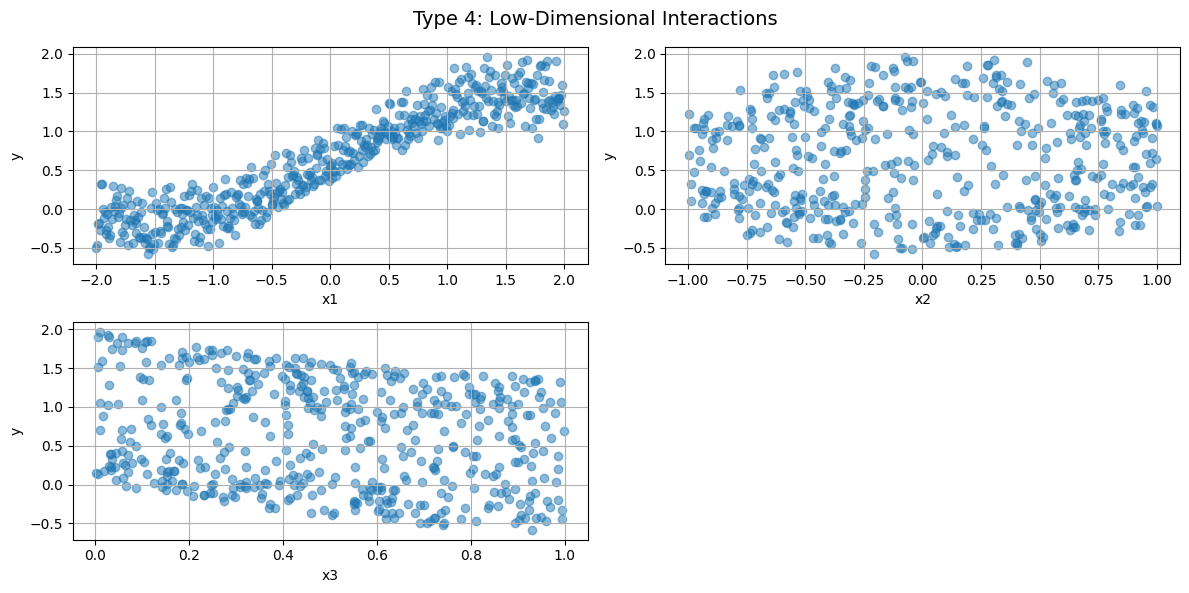

In [ ]:
# --- 4. Low-Dimensional Interactions with High-Dimensional Input ---
x_1 = np.linspace(-2, 2, 500)
x_2 = np.random.uniform(-1, 1, 500)
x_3 = np.random.uniform(0, 1, 500)

y = np.sin(x_1) * np.cos(x_2) + np.exp(-x_3)

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type4.mat", {"X": X})

plot_synthetic_data(X, "Type 4: Low-Dimensional Interactions", ["x1", "x2", "x3"])



## **5. Mixed Additive and Interaction Terms**
- **Formula:** $y = x_1^2 + x_2^2 + x_3 x_4 + \epsilon$
- **Expected Behavior:** OAK should separate additive terms from interactions, while Additive GP may mix them.

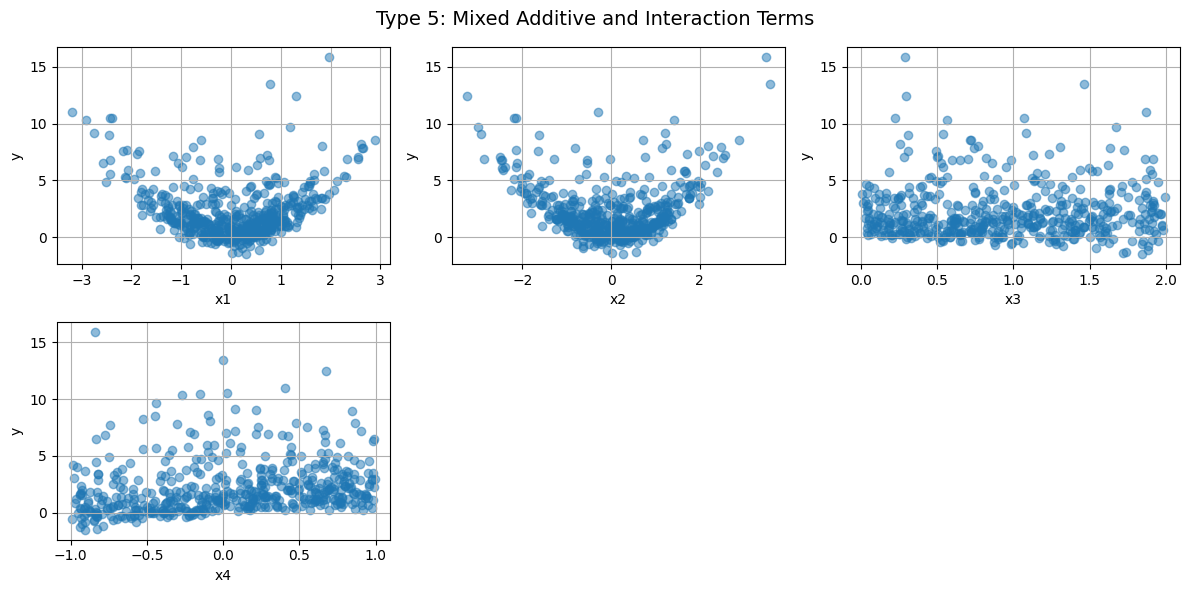

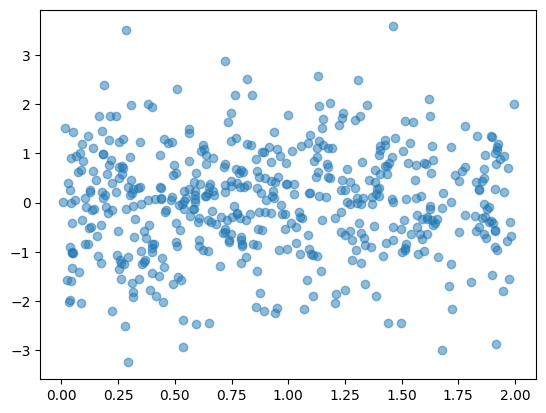

In [ ]:
# --- 5. Mixed Additive and Interaction Terms ---
x_1 = np.random.normal(0, 1, 500)
x_2 = np.random.normal(0, 1, 500)
x_3 = np.random.uniform(0, 2, 500)
x_4 = np.random.uniform(-1, 1, 500)

y = x_1**2 + x_2**2 + x_3 * x_4  # Mix of additive and interaction terms

X = np.column_stack((y, x_1, x_2, x_3, x_4))
# scipy.io.savemat("data/synthetic_behaviour_type5.mat", {"X": X})

plot_synthetic_data(X, "Type 5: Mixed Additive and Interaction Terms", ["x1", "x2", "x3", "x4"])

#plotting x3 against x4
plt.scatter(X[:, 3], X[:, 2], alpha=0.5, label=f"x3 vs x4")









## **6. High-Dimensional Redundant Features**
- **Formula:** \( y = \sin(x_1) + x_2^2 + 0.1 \times \sum_{i=3}^{10} x_i + \epsilon \)
- **Expected Behavior:** OAK should ignore the redundant features, while Additive GP may struggle.


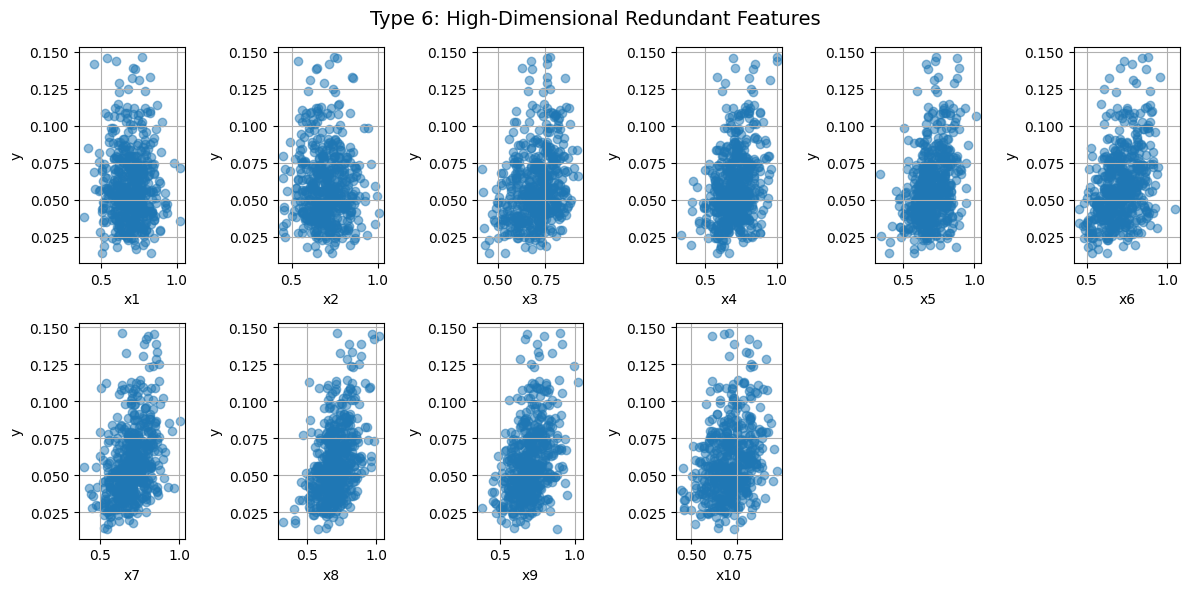

In [ ]:
# --- 6. High-Dimensional Redundant Features ---
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_3 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_4 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_5 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_6 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_7 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_8 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_9 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_10 = np.random.normal(loc=0.7, scale=0.1, size=500)

y = (x_3 * x_4 * x_5 * x_6 * x_7 * x_8 * x_9 * x_10)

X = np.column_stack((y, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10))
scipy.io.savemat("data/synthetic_behaviour_type6.mat", {"X": X})

plot_synthetic_data(X, "Type 6: High-Dimensional Redundant Features", ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])


# Classification

Generating classification synthetic datasets at varying orders and number of class 

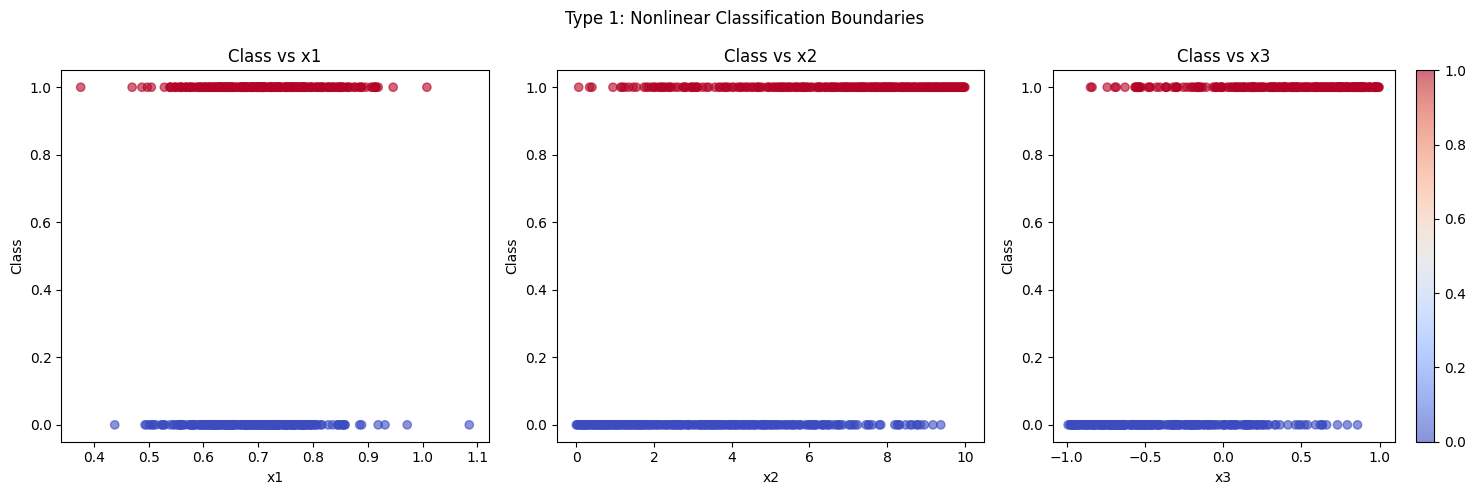

Class distribution:
Class 0: 250
Class 1: 250


In [ ]:
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic features
np.random.seed(42)  # For reproducibility
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.linspace(0, 10, len(x_1))
x_3 = np.random.uniform(-1, 1, size=len(x_1))

# Create a nonlinear decision boundary using the features
# We'll use a combination of nonlinear transforms similar to your regression example
decision_boundary = np.sin(x_1) + np.log(1 + x_2) + np.exp(x_3)

# Convert to binary classes using a threshold
# Class 1 if the decision boundary value is above its median, Class 0 otherwise
y = (decision_boundary > np.median(decision_boundary)).astype(int)

# Stack features and target
X = np.column_stack((y, x_1, x_2, x_3))

# Save the dataset
scipy.io.savemat("data/synthetic_classification_type1.mat", {"X": X})

def plot_synthetic_classification_data(X, title, feature_names):
    """
    Plot the synthetic classification dataset
    """
    fig = plt.figure(figsize=(15, 5))
    
    # Create three subplots for each feature vs class
    for i in range(3):
        ax = fig.add_subplot(1, 3, i+1)
        scatter = ax.scatter(X[:, i+1], X[:, 0], 
                           c=X[:, 0], 
                           cmap='coolwarm',
                           alpha=0.6)
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Class')
        ax.set_title(f'Class vs {feature_names[i]}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.colorbar(scatter)
    plt.show()

# Plot the dataset
plot_synthetic_classification_data(X, "Type 1: Nonlinear Classification Boundaries", ["x1", "x2", "x3"])

# Print class distribution
print(f"Class distribution:\nClass 0: {sum(y == 0)}\nClass 1: {sum(y == 1)}")

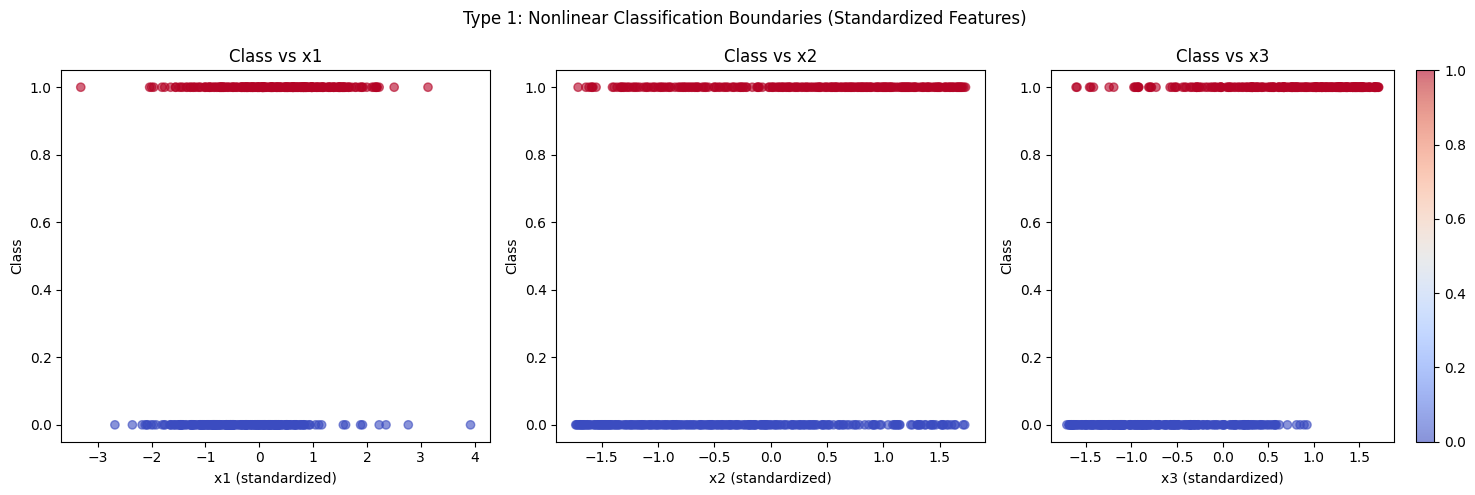

Class distribution:
Class 0: 250
Class 1: 250

Feature statistics after standardization:

x1:
Mean: -0.000
Std: 1.000

x2:
Mean: -0.000
Std: 1.000

x3:
Mean: 0.000
Std: 1.000


In [ ]:
# Generate synthetic features
np.random.seed(42)  # For reproducibility
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.linspace(0, 10, len(x_1))
x_3 = np.random.uniform(-1, 1, size=len(x_1))

# Standardize features
scaler = StandardScaler()
X_features = np.column_stack((x_1, x_2, x_3))
X_features_scaled = scaler.fit_transform(X_features)

# Extract scaled features
x_1_scaled = X_features_scaled[:, 0]
x_2_scaled = X_features_scaled[:, 1]
x_3_scaled = X_features_scaled[:, 2]

# Create a nonlinear decision boundary using the scaled features
decision_boundary = np.sin(x_1_scaled) + np.log(1 + x_2_scaled - np.min(x_2_scaled)) + np.exp(x_3_scaled)

# Convert to binary classes using a threshold
y = (decision_boundary > np.median(decision_boundary)).astype(int)

# Stack features and target (using scaled features)
X = np.column_stack((y, x_1_scaled, x_2_scaled, x_3_scaled))

# Save the dataset
scipy.io.savemat("data/synthetic_classification_type2.mat", {"X": X})

def plot_synthetic_classification_data(X, title, feature_names):
    """
    Plot the synthetic classification dataset
    """
    fig = plt.figure(figsize=(15, 5))
    
    # Create three subplots for each feature vs class
    for i in range(3):
        ax = fig.add_subplot(1, 3, i+1)
        scatter = ax.scatter(X[:, i+1], X[:, 0], 
                           c=X[:, 0], 
                           cmap='coolwarm',
                           alpha=0.6)
        ax.set_xlabel(f'{feature_names[i]} (standardized)')
        ax.set_ylabel('Class')
        ax.set_title(f'Class vs {feature_names[i]}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.colorbar(scatter)
    plt.show()

# Plot the dataset
plot_synthetic_classification_data(X, "Type 1: Nonlinear Classification Boundaries (Standardized Features)", 
                                 ["x1", "x2", "x3"])

# Print class distribution and feature statistics
print("Class distribution:")
print(f"Class 0: {sum(y == 0)}")
print(f"Class 1: {sum(y == 1)}")
print("\nFeature statistics after standardization:")
for i, name in enumerate(['x1', 'x2', 'x3']):
    print(f"\n{name}:")
    print(f"Mean: {np.mean(X[:, i+1]):.3f}")
    print(f"Std: {np.std(X[:, i+1]):.3f}")